In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from statsmodels.tsa.seasonal import seasonal_decompose

In [26]:
file_path_NO2 = "../data/processed/NO2_by_station.csv"
df_NO2 = pd.read_csv(file_path_NO2)
df_NO2['time'] = pd.to_datetime(df_NO2['time'])

file_path_O3 = '../data/processed/O3_by_station.csv'
df_O3 = pd.read_csv(file_path_O3)
df_O3['time'] = pd.to_datetime(df_O3['time'])

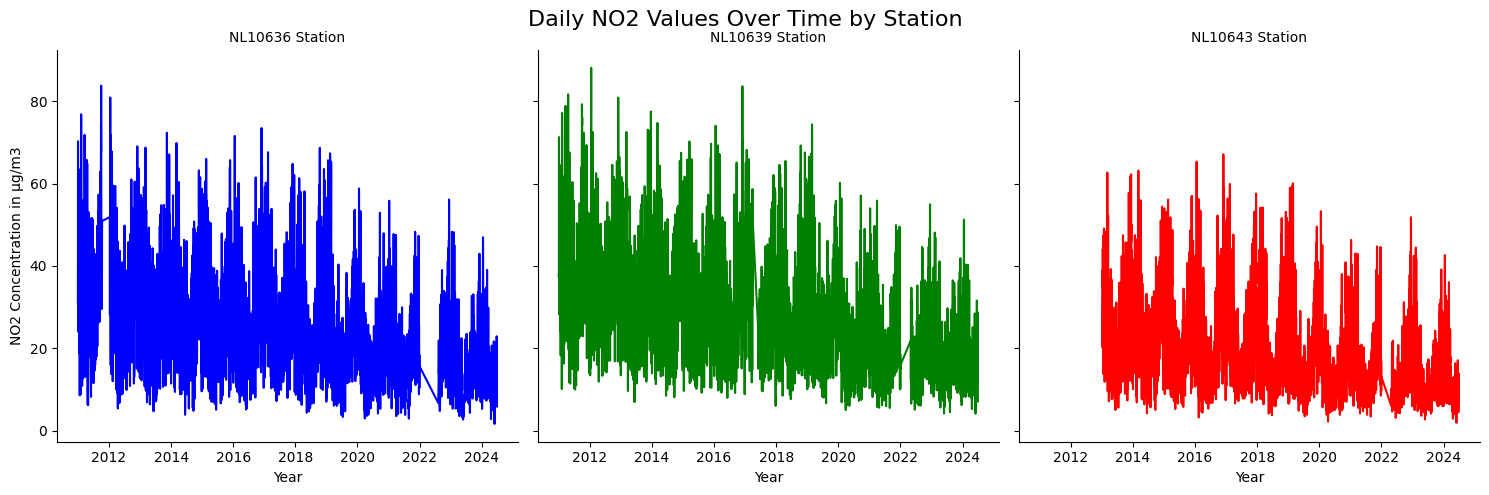

In [27]:
# NO2 graphs for the three stations separately

df_NO2_melted = df_NO2.melt(id_vars=['time'], var_name='station', value_name='NO2_value')

g = sns.FacetGrid(df_NO2_melted, col='station', col_wrap=3, height=5, aspect=1)
colors = ['blue', 'green', 'red'] 
g.map_dataframe(sns.lineplot, x='time', y='NO2_value', color='black') 

for ax, color in zip(g.axes.flat, colors):
    for line in ax.get_lines(): 
        line.set_color(color)
        
g.set_titles("{col_name} Station")
g.set_axis_labels("Year", "NO2 Concentration in µg/m3")
g.figure.subplots_adjust(top=0.9)
g.figure.suptitle('Daily NO2 Values Over Time by Station', fontsize=16)

plt.show()

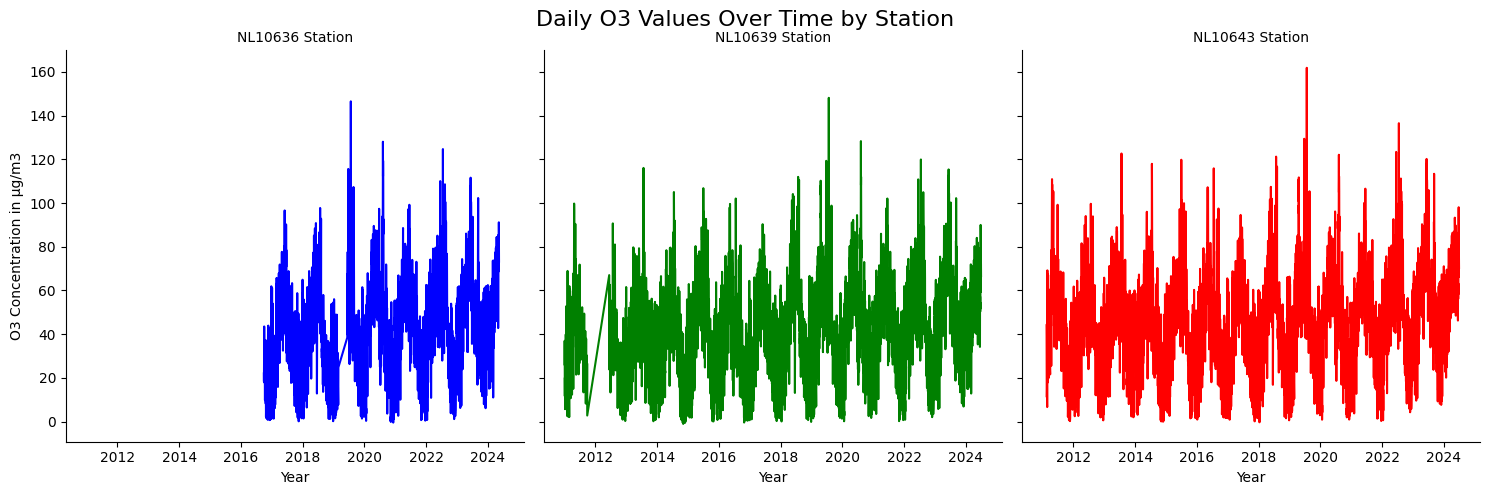

In [28]:
# O3 graphs for the three stations separately
df_O3_melted = df_O3.melt(id_vars=['time'], var_name='station', value_name='O3_value')

g = sns.FacetGrid(df_O3_melted, col='station', col_wrap=3, height=5, aspect=1)
colors = ['blue', 'green', 'red'] 
g.map_dataframe(sns.lineplot, x='time', y='O3_value', color='black')

for ax, color in zip(g.axes.flat, colors):
    for line in ax.get_lines():
        line.set_color(color)
        
g.set_titles("{col_name} Station")
g.set_axis_labels("Year", "O3 Concentration in µg/m3")
g.figure.subplots_adjust(top=0.9)
g.figure.suptitle('Daily O3 Values Over Time by Station', fontsize=16)

plt.show()

In [29]:
# Load the particles datasets averaged across stations
file_path_NO2_avg = '../data/processed/NO2_across_stations.csv' 
df_NO2 = pd.read_csv(file_path_NO2_avg)
df_NO2['date'] = pd.to_datetime(df_NO2['date'])

file_path_O3_avg = '../data/processed/O3_across_stations.csv'
df_O3 = pd.read_csv(file_path_O3_avg)
df_O3['date'] = pd.to_datetime(df_O3['date'])

C:\Users\elikl\AppData\Local\Temp\ipykernel_3476\3639997175.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  i_df[column] = i_df[column].fillna(method='ffill')


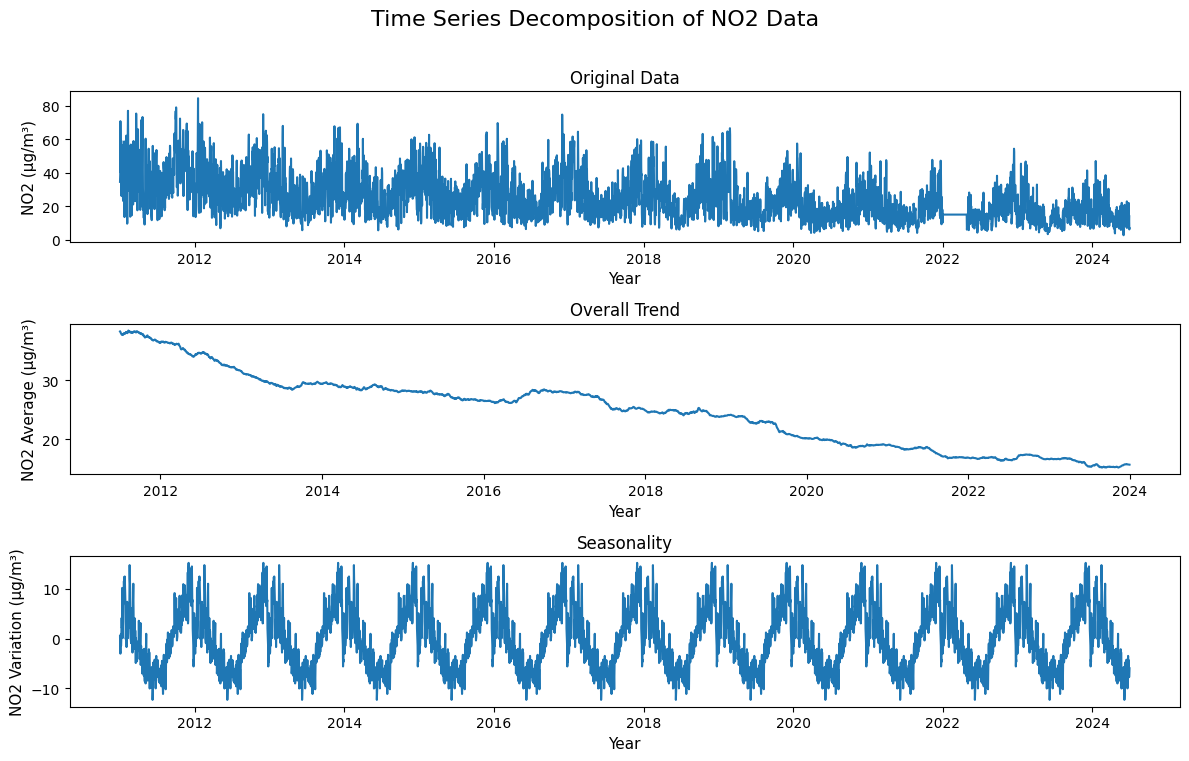

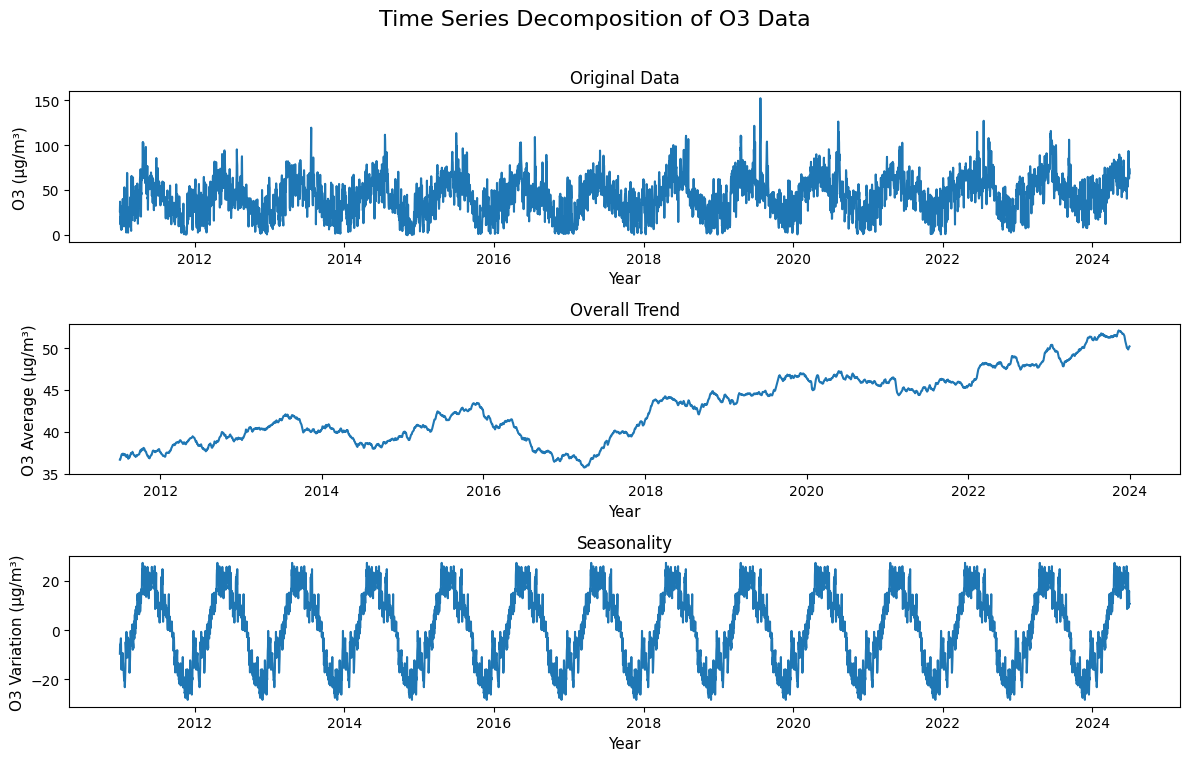

In [30]:
# Time series decomposition for both particle datasets


def plot_time_series_decomposition(df: pd.DataFrame, column: str) -> None:
    """
    Plots the time series decomposition of a specified column from a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the data to be decomposed.
                           It must include a 'date' column.
        column (str): The name of the column to be decomposed.

    Returns:
        None: The function displays the decomposition plots but does not return any value.
    """
    i_df = df.copy()
    i_df.set_index("date", inplace=True)
    i_df[column] = i_df[column].fillna(method="ffill")

    decomposition = seasonal_decompose(i_df[column], model="additive", period=365)

    trend = decomposition.trend
    seasonal = decomposition.seasonal

    plt.figure(figsize=(12, 9))

    ax1 = plt.subplot(411)
    ax1.plot(i_df[column])
    ax1.set_title("Original Data", fontsize=12)
    ax1.set_ylabel(f"{column} (µg/m³)", fontsize=11)
    ax1.set_xlabel("Year", fontsize=11)

    ax2 = plt.subplot(412)
    ax2.plot(trend)
    ax2.set_title("Overall Trend", fontsize=12)
    ax2.set_ylabel(f"{column} Average (µg/m³)", fontsize=11)
    ax2.set_xlabel("Year", fontsize=11)

    ax3 = plt.subplot(413)
    ax3.plot(seasonal)
    ax3.set_title("Seasonality", fontsize=12)
    ax3.set_ylabel(f"{column} Variation (µg/m³)", fontsize=11)
    ax3.set_xlabel("Year", fontsize=11)

    plt.tight_layout()
    plt.suptitle(f"Time Series Decomposition of {column} Data", fontsize=16, y=1.05)
    plt.show()


plot_time_series_decomposition(df_NO2, "NO2")
plot_time_series_decomposition(df_O3, "O3")

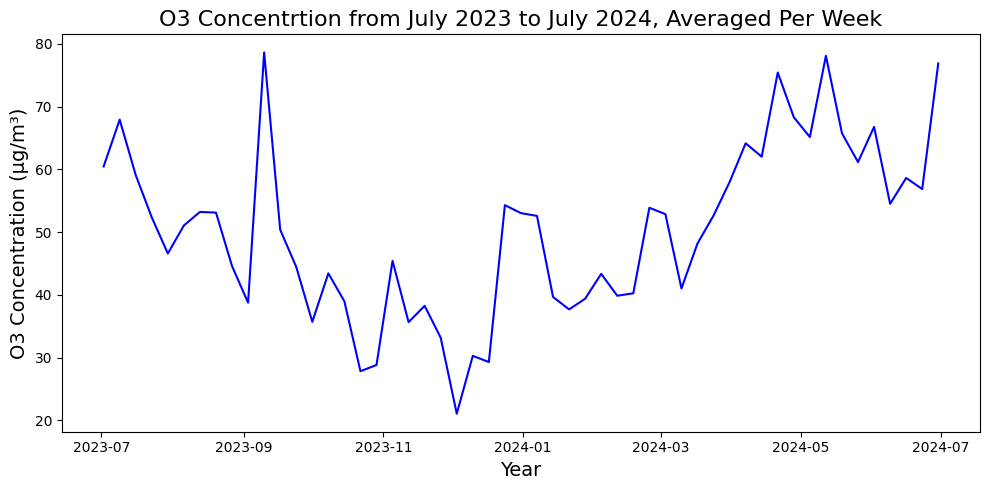

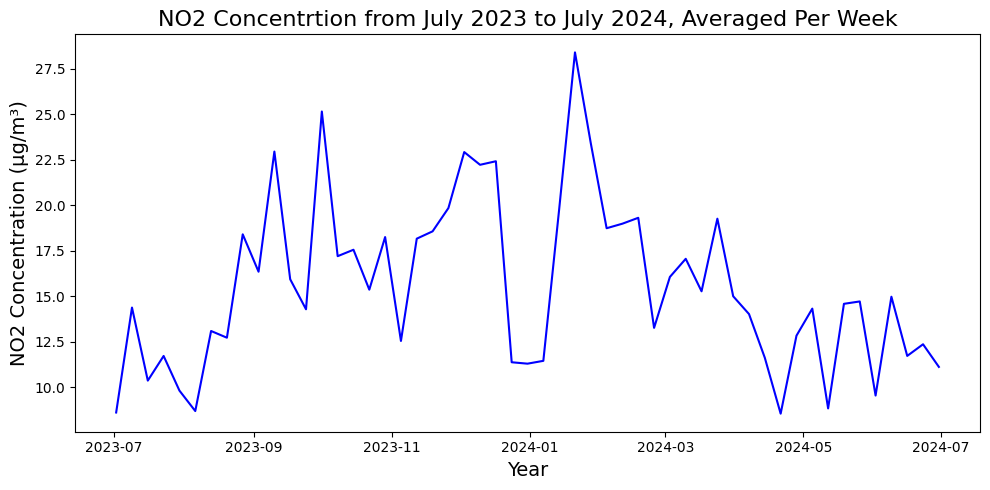

In [31]:
# Plotting particle data averaged out over the weeks for 2023-2024


def particles_averaged_per_week_1_year(df: pd.DataFrame, name: str) -> None:
    """
    Plots the weekly averaged concentration of a specified particle over the last year.

    Args:
        df (pd.DataFrame): DataFrame containing the date and concentration data.
        name (str): The name of the particle to plot.

    Returns:
        None: The function displays the plot but does not return any value.
    """
    latest_date = df["date"].max()

    last_year = latest_date - pd.DateOffset(years=1)
    df_last_year = df[df["date"] >= last_year]

    df_last_year.set_index("date", inplace=True)
    df_weekly_avg = df_last_year.resample("W").mean().reset_index()

    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df_weekly_avg, x="date", y=name, color="blue")
    plt.title(
        f"{name} Concentration from July 2023 to July 2024, Averaged Per Week",
        fontsize=16,
    )
    plt.xlabel("Year", fontsize=14)
    plt.ylabel(f"{name} Concentration (µg/m³)", fontsize=14)
    plt.tight_layout()

    plt.show()


particles_averaged_per_week_1_year(df_O3, "O3")
particles_averaged_per_week_1_year(df_NO2, "NO2")

In [32]:
# Plot a "normal year" for particles compared to the current year
def normal_year_plot(df: pd.DataFrame, name: str) -> None:
    """
    Compares weekly averaged concentrations of a specified particle between the current year and previous years.

    Args:
        df (pd.DataFrame): DataFrame containing the date and concentration data.
        name (str): The name of the particle to plot.

    Returns:
        None: The function displays the plot but does not return any value.
    """
    latest_date = df["date"].max()
    current_year = latest_date.year
    df.set_index("date", inplace=True)
    df["year"] = df.index.year
    df_current_year = df[df["year"] == current_year]

    df_previous_years = df[df["year"] < current_year]
    df_previous_years_weekly = df_previous_years.resample("W").mean()
    df_current_year_weekly = df_current_year.resample("W").mean()

    df_previous_years_weekly["month"] = df_previous_years_weekly.index.strftime("%B")
    df_current_year_weekly["month"] = df_current_year_weekly.index.strftime("%B")

    df_previous_years_weekly["year"] = "Normal Year"
    df_current_year_weekly["year"] = "Current Year"

    df_previous_years_weekly = df_previous_years_weekly[[name, "month", "year"]]
    df_current_year_weekly = df_current_year_weekly[[name, "month", "year"]]

    df_combined = pd.concat([df_previous_years_weekly, df_current_year_weekly])
    month_order = [
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ]

    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=df_combined, x="month", y=name, hue="year", palette=["gray", "blue"]
    )

    plt.title(f"Weekly Averaged {name}: Normal Year vs. Current Year", fontsize=16)
    plt.xlabel("Month", fontsize=12)
    plt.ylabel(f"{name} Concentration (µg/m³)", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

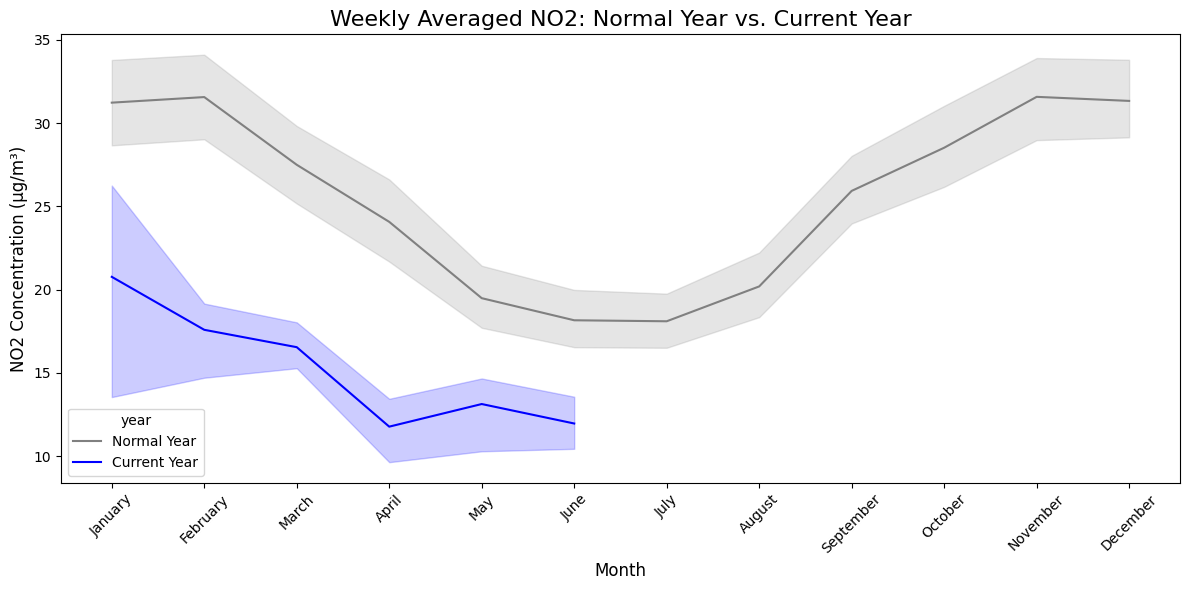

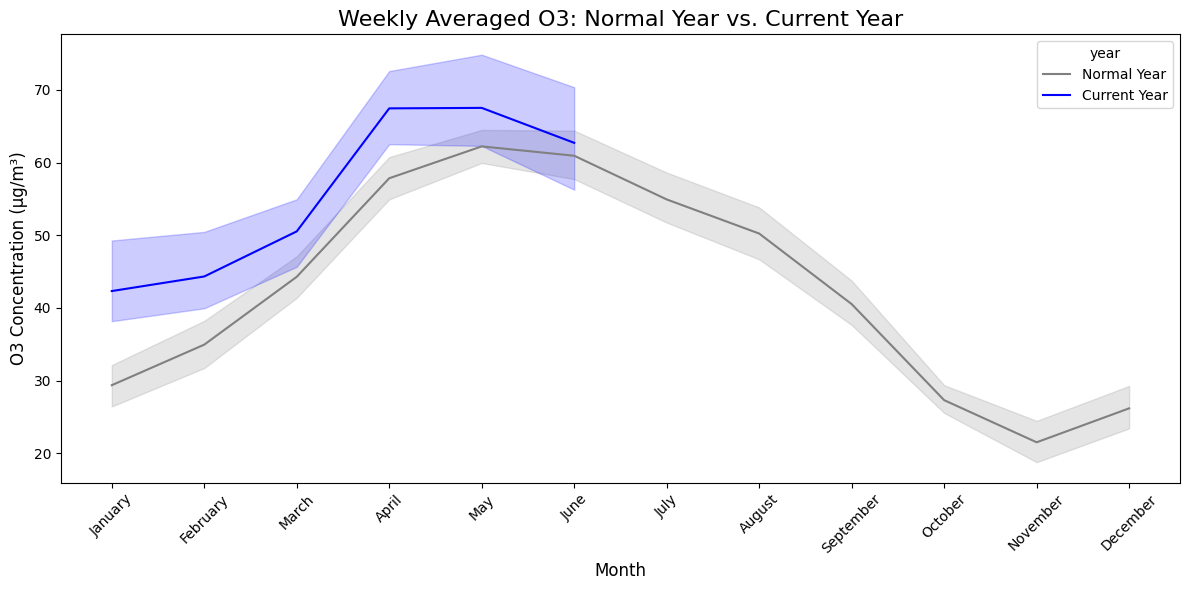

In [33]:
normal_year_plot(df_NO2, 'NO2')
normal_year_plot(df_O3, 'O3')

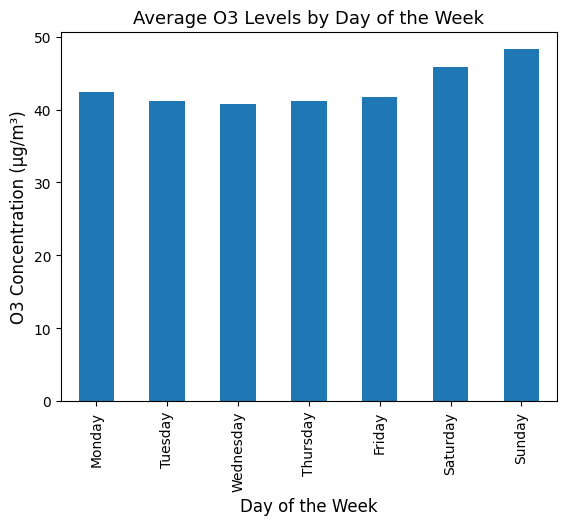

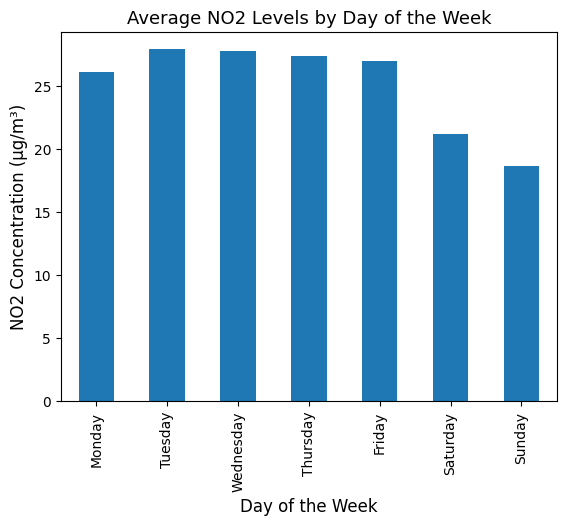

In [38]:
def plot_weekday_avg(df: pd.DataFrame, particle: str) -> None:
    """
    Plots the average concentration of a specified particle for each day of the week.

    Args:
        df (pd.DataFrame): DataFrame containing the date and concentration data.
        particle (str): The name of the particle to plot.

    Returns:
        None: The function displays the plot but does not return any value.
    """
    df["day_of_week"] = df.index.dayofweek
    df["weekday_name"] = df.index.day_name()
    weekly_levels = (
        df.groupby("weekday_name")[particle]
        .mean()
        .reindex(
            [
                "Monday",
                "Tuesday",
                "Wednesday",
                "Thursday",
                "Friday",
                "Saturday",
                "Sunday",
            ]
        )
    )

    weekly_levels.plot(kind="bar")
    plt.title(f"Average {particle} Levels by Day of the Week", fontsize=13)
    plt.xlabel("Day of the Week", fontsize=12)
    plt.ylabel(f"{particle} Concentration (µg/m³)", fontsize=12)
    plt.show()


plot_weekday_avg(df_O3, "O3")
plot_weekday_avg(df_NO2, "NO2")